In [33]:
# testing loading frames from a real video
import numpy as np
import cv2 as cv 


#load the video
cap = cv.VideoCapture('data/real_road.mp4')

cv.namedWindow('frame', cv.WINDOW_NORMAL)

#show the frames one at a time
while(cap.isOpened()):
    ret, frame = cap.read()

    if ret:
        #1280x720 rgb

        frame = frame[-360:-50, 200:1080,:]
        frame = cv.resize(frame, (640, 480))
        #flip the frame horizontally
        # frame = cv.flip(frame, 1)
        cv.imshow('frame', frame)
        if cv.waitKey(10) & 0xFF == ord('q'):
            break
    else:
        break




cv.destroyAllWindows()

In [31]:
# testing eroding the lines in the map
import numpy as np
import cv2 as cv

img = cv.imread('2021_Small.png')
img = cv.erode(img, None, iterations=2)
cv.imwrite('2021_Small_eroded.png', img)

True

In [ ]:
# GET POSITION BY CLICKING ON THE MAP
# then save it in the variable event_points.npy, aleady in R coord

import numpy as np
import cv2 as cv
import os
from Simulator.src.helper_functions import *

wind_name = 'Get position'
event_points = []

def mouse_callback(event,x,y,flags,param):
    if event == cv.EVENT_LBUTTONDBLCLK:
        # cv.circle(img, (x,y), 50, (0,200,0), 10)
        p_pix = np.array([x,y])
        p = pix2mR(p_pix)
        print(p)
        event_points.append(p)
        cv.circle(img, mR2pix(p), 50, (200,0,200), 10)
        cv.circle(img, mR2pix(p), 3, (200,0,200), -1)
        cv.putText(img, str(p), mR2pix(p), cv.FONT_HERSHEY_SIMPLEX, 1, (200,100,200), 2)

img = cv.imread('data/2021_VerySmall.png')
cv.namedWindow(wind_name, cv.WINDOW_NORMAL)
cv.imshow(wind_name, img)

cv.setMouseCallback(wind_name, mouse_callback)

while True:
    cv.imshow(wind_name, img)
    key = cv.waitKey(1) 
    if key == 27: #ESC
        print('Exiting...')
        break


cv.destroyAllWindows()

In [ ]:
import numpy as np
import cv2 as cv
import os
from Simulator.src.helper_functions import *



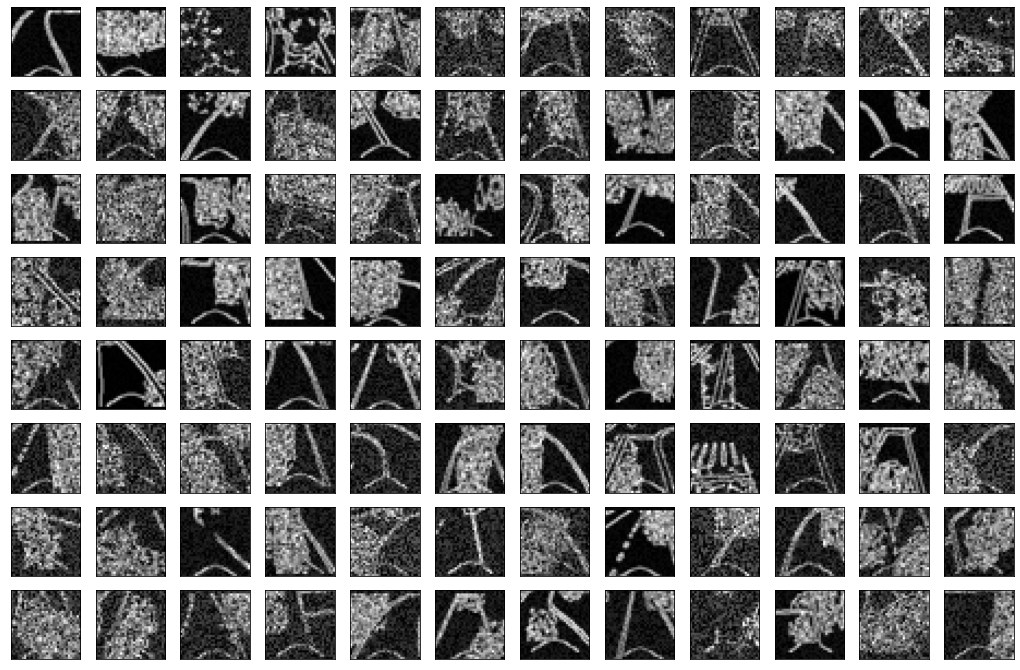

In [16]:
# Generate image collage for presentation
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 as cv 

def plot_nchw_data(data, h_num, v_num, title, size=(10, 10)):
    fig, axs = plt.subplots(h_num, v_num, figsize=size)
    # shape = data.shape
    # data = data.reshape(shape[0]*shape[1], shape[2], shape[3])
    for idx, ax in enumerate(axs.flatten()):
        ax.set_xticks([])
        ax.set_yticks([])
        if idx < len(data):
            ax.imshow(data[idx,:,:], cmap='gray')
    if title is not None:
        plt.suptitle(title)
    #plt.tight_layout(rect=[0, 0, 1, 0.97], h_pad=0, w_pad=0)
    plt.show()
    return fig

folder = os.path.join('random_stuff', 'imgs_presentation')

#get all the images inside the folder
imgs = []
for file in os.listdir(folder):
    if file.endswith('.png') and file.startswith('img'):
        img = cv.imread(os.path.join(folder, file))
        #convert to grayscale
        img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        cv.imshow('img', img)
        if cv.waitKey(1) == 27:
            break
        imgs.append(img)
cv.destroyAllWindows()

data = np.zeros((len(imgs),512,512), dtype=np.uint8)
for i in range(len(imgs)):
    data[i,:,:] = imgs[i]

figure = plot_nchw_data(data, 8, 12, None, size=(18,12))




